In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data = pd.read_csv("C:/Users/CUB/Downloads/Machine-Learning-Deep-Learning-in-Python-R/practice files/excel or csv/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
iso = IsolationForest(contamination=0.1, random_state=42)
outliers = iso.fit_predict(X_scaled)
X_filtered = X_scaled[outliers == 1]

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

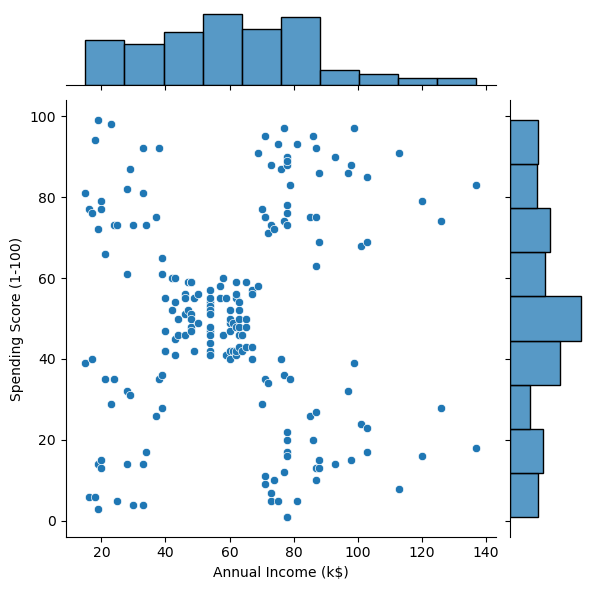

In [11]:
sns.jointplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data)

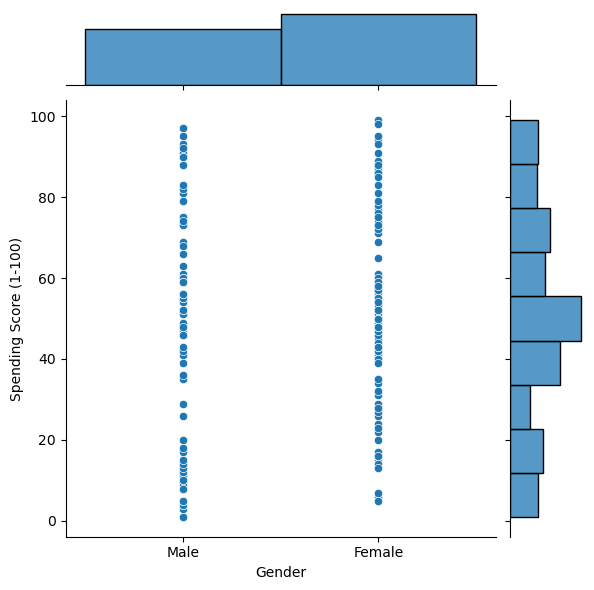

In [12]:
sns.jointplot(x="Gender", y="Spending Score (1-100)", data=data)

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

C:\Users\CUB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


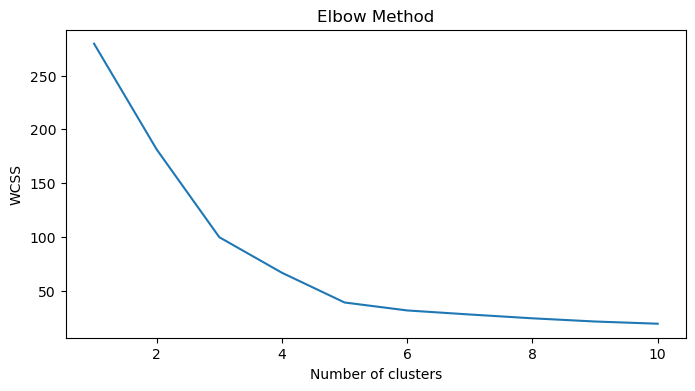

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
optimal_clusters = 5  # Choose based on the elbow method

In [31]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [32]:
y_kmeans = kmeans.fit_predict(X_pca)

In [33]:
silhouette_avg = silhouette_score(X_pca, y_kmeans)
db_index = davies_bouldin_score(X_pca, y_kmeans)

In [34]:
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Index: {db_index:.2f}')

Silhouette Score: 0.57
Davies-Bouldin Index: 0.56


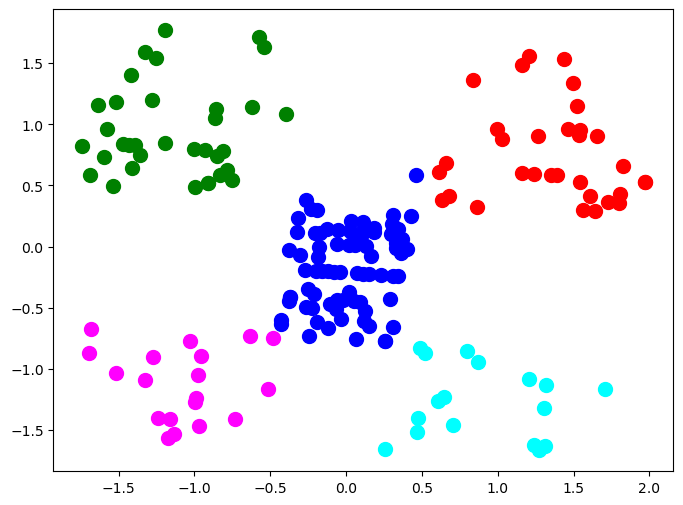

In [35]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

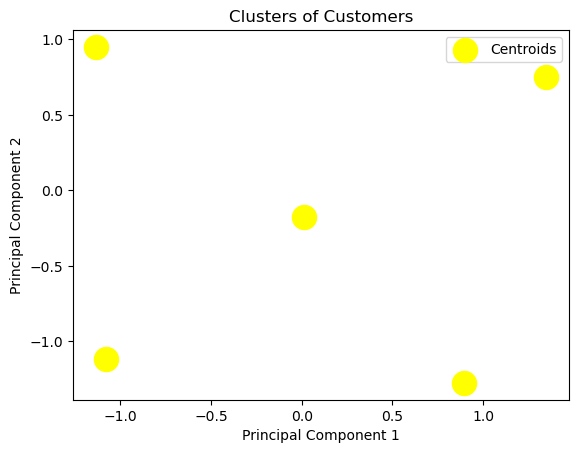

In [36]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()